In [1]:
%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def computeChiSqPval(beamonhist,beamoffhist,mchist):
    
    #beamonhist, beamoffhist are vectors of the histogram bin contents
    #mchist is vector of the summed MC histograms (cosmic+pion+kaon whatever)
    
    #it is just, Δχ2 = (number of events signal in Energy bins in a 1D matrix) 
    #(2D Martix - (statistical uncertainty)^2 in a the diagonal of the matrix)^-1 
    #(number of events signal in Energy bins in a 1D matrix)^Transpose

    nbins = len(beamonhist)
    
    #error matrix of stat uncertainty, diagonals only
    #diagonal is (beamon-beamoff stat error)^2 + (mchist stat error)^2 [no sqrt]
    #mchist stat error is sqrt(N_mc)
    #beamon-beamoff stat error is sqrt( sqrt(N_beamon)^2 + sqrt(N_beamoff)^2 )
    #  = sqrt( N_beamon + N_beamoff )
    emtx   = np.zeros((nbins,nbins))
    datavec = np.array(np.array(beamonhist)-np.array(beamoffhist)).reshape((1,nbins))
    mcvec  = np.array(mchist)
    
    for x in xrange(nbins):
        emtx[x][x] = beamonhist[x]+beamoffhist[x]+mchist[x]
        if not (beamonhist[x]+beamoffhist[x]+mchist[x]):
            emtx[x][x] = 1
    
    emtxinv = np.linalg.inv(emtx)
    
    chisq = float((datavec-mcvec).dot(emtxinv).dot((datavec-mcvec).T))
    #print "Sqrt of that (==sigma?) is ",np.sqrt(chisq)
    #print "Chisq is",chisq
    #print "DOF is",nbins
    pval = stats.chi2.cdf(chisq,nbins)
    #print "Pval is",pval
    return pval

In [3]:
test_mchist = np.array([ 220.0651705,529.16609298,461.93033182,386.66299509,212.26306852, \
                        137.22520538,108.08205975,61.49892147,44.51787599,25.9305154, \
                        15.60420396, 9.40841709, 3.21263023, 1.60631511, 0.68842076, \
                        0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
test_beamonhist = np.array([ 281.76229508, 552.25409836,510.24590164,428.27868852,253.07377049,\
                             152.66393443,108.60655738, 84.01639344,49.18032787,36.8852459,\
                               13.31967213, 10.24590164, 4.09836066, 0., 2.04918033,\
                            0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
test_beamoffhist = np.array([ 46.44094577,76.83865573,48.12970744,44.75218411,34.61961412,\
                              11.82133165,16.04323581,10.97695082,3.37752333,4.22190416,\
                               0.84438083,0.,0.84438083,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])

In [4]:
print "Including uncertainty of beam on, beam off, AND MC gets you this pval:"
print computeChiSqPval(test_beamonhist[:-10],test_beamoffhist[:-10],test_mchist[:-10])
print "Using the full bin range which includes 0 bins in MC has to use a modified chisquare"
print "this assumes at least 1 mc event in all bins, otherwise the error matrix wont invert"
print "using the full bin range gets you:"
print computeChiSqPval(test_beamonhist,test_beamoffhist,test_mchist)
print "The lesson here is to only include bins with > 10 or so entries, since chisq"
print "assumes gaussian distribution within bins, which is not valid for < 10 entries."

Including uncertainty of beam on, beam off, AND MC gets you this pval:
0.0877999257339
Using the full bin range which includes 0 bins in MC has to use a modified chisquare
this assumes at least 1 mc event in all bins, otherwise the error matrix wont invert
using the full bin range gets you:
0.000682151081504
The lesson here is to only include bins with > 10 or so entries, since chisq
assumes gaussian distribution within bins, which is not valid for < 10 entries.


In [5]:
def getchisqfn(dof):
    chisqvals = np.linspace(0,50,100)
    binwidth = chisqvals[1]-chisqvals[0]
    yvals = []
    for chisqval in chisqvals:
        yvals.append(stats.chi2.cdf(chisqval,dof))
    deriv = []
    for y in xrange(len(yvals)-1):
        deriv.append((yvals[y+1]-yvals[y])/binwidth)
    return chisqvals[:-1], deriv

def getchisqcdf(dof):
    chisqvals = np.linspace(0,50,100)
    binwidth = chisqvals[1]-chisqvals[0]
    yvals = []
    for chisqval in chisqvals:
        yvals.append(stats.chi2.cdf(chisqval,dof))
    return chisqvals, yvals

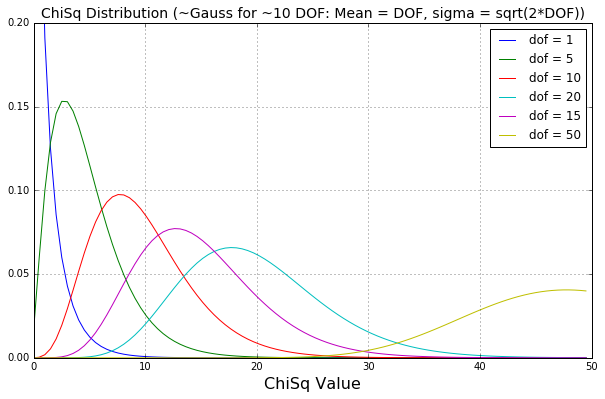

In [6]:
#plt.plot(chisqvals,yvals,'ro--')
plt.figure(figsize=(10,6))
for dof in [1, 5, 10, 20, 15, 50]:
    myx, myy = getchisqfn(dof)
    plt.plot(myx,myy,'-',label="dof = %d"%dof)
plt.legend(loc='best')
plt.ylim(0,0.2)
plt.grid(True)
plt.title("ChiSq Distribution (~Gauss for ~10 DOF: Mean = DOF, sigma = sqrt(2*DOF))",
          fontsize=14)
plt.xlabel('ChiSq Value',fontsize=16)

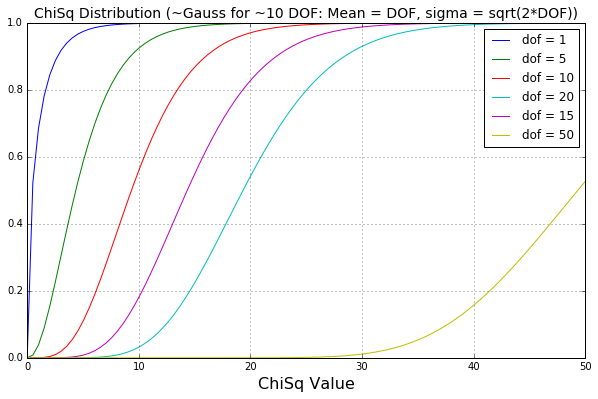

In [7]:
plt.figure(figsize=(10,6))
for dof in [1, 5, 10, 20, 15, 50]:
    myx, myy = getchisqcdf(dof)
    plt.plot(myx,myy,'-',label="dof = %d"%dof)
plt.legend(loc='best')
#plt.ylim(0,0.2)
plt.grid(True)
plt.title("ChiSq Distribution (~Gauss for ~10 DOF: Mean = DOF, sigma = sqrt(2*DOF))",
          fontsize=14)
plt.xlabel('ChiSq Value',fontsize=16)

In [8]:
print "Example: I measure chisq is 20, with 15 DOF in my measurement."
print "I can calculate the area under the 15-DOF chisq function (two plots up)"
print "from x=0 to 20, or I can look at x=20 on the cumulative function (one plot up)."
print "I find this p value:", stats.chi2.cdf(20,15)
print
print "If instead I approximate the chisq function as a gaussian centered at"
print "15 with a mean of sqrt(2*15), I can integrate that gaussian from -infinity"
print "to 20 to get this p value:", stats.norm.cdf(20,loc=15,scale=np.sqrt(2*15))
print
print "Remember, if the chisq is zero then the two histograms come from the same distribution,"
print "which corresponds to a SMALL pvalue. If you want two histograms to agree, you want"
print "to MINIMIZE the pvalue."

Example: I measure chisq is 20, with 15 DOF in my measurement.
I can calculate the area under the 15-DOF chisq function (two plots up)
from x=0 to 20, or I can look at x=20 on the cumulative function (one plot up).
I find this p value: 0.828067310623

If instead I approximate the chisq function as a gaussian centered at
15 with a mean of sqrt(2*15), I can integrate that gaussian from -infinity
to 20 to get this p value: 0.819344785737

Remember, if the chisq is zero then the two histograms come from the same distribution,
which corresponds to a SMALL pvalue. If you want two histograms to agree, you want
to MINIMIZE the pvalue.
